# Project 2:  Lucid Titanic Sleuthing

## Part 1: Developing an understanding of the data

#### Based on the description of the data you read in the readme describe in your own words this data.

#### Based on our conceptual understanding of the columns in this data set.  What are the reasonable range of the values for the Sex, Age, SibSp, Parch columns.

### Open the data in sublime text is there anything that jumps out to you?

## Part 2: reading the data in

#### Now read the data into a Pandas DataFrame

In [656]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn import preprocessing
import math
import re

In [657]:
def import_refresh_data(ship):
    if ship == "Titanic":
        titanic_path = "assets/titanic.csv"
        data = pd.read_csv(titanic_path)
    elif ship == "Lusitania":
        lusitania_path = "assets/lusitania.csv"
        data = pd.read_csv(lusitania_path, encoding = "ISO-8859-1")        
    else:
        print ("Wrong ship!")
    return(data)

In [658]:
titanic_data = import_refresh_data("Titanic")

In [659]:
titanic_data.head().T

,0,1,2,3,4
pclass,1,1,1,1,1
survived,1,1,0,0,0
name,"Allen, Miss. Elisabeth Walton","Allison, Master. Hudson Trevor","Allison, Miss. Helen Loraine","Allison, Mr. Hudson Joshua Creighton","Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
sex,female,male,female,male,female
age,29,0.92,2,30,25
sibsp,0,1,1,1,1
parch,0,2,2,2,2
ticket,24160,113781,113781,113781,113781
fare,211.338,151.55,151.55,151.55,151.55
cabin,B5,C22 C26,C22 C26,C22 C26,C22 C26


In [660]:
lusitania_data = import_refresh_data("Lusitania")

In [661]:
lusitania_data.head().T

,0,1,2,3,4
Family name,CAMERON,CARR-JONES,DRAKEFORD,HAWKINS,HEMINGWAY
Title,Mr.,Mr.,Mr.,Mr.,Mr.
Personal name,Charles W.,E.,Edward,Handel,John William
Fate,Lost,Lost,Saved,Saved,Saved
Age,38,37,30,25,27
Department/Class,Band,Band,Band,Band,Band
Passenger/Crew,Crew,Crew,Crew,Crew,Crew
Citizenship,British,British,British,British,British
Position,NaN,NaN,Violin,Cello,Double Bass
Status,NaN,NaN,NaN,NaN,NaN


#### Check that the age column doesn't have any unreasonable values 

#### Check for missing values.  How do you know that a value is missing?

#### Does it makes sense to guess at the value?

### Checking and cleaning data

#### Titanic

In [662]:
# This function will be used for both Titanic and Lusitania for checking column values
def column_data_explore(df, column):
    nulls = sum(df[column].isnull())
    data_type = df[column].dtype
    unique_values = sorted(df[column].unique())
    print ("Number of null values are " + column + " column is " + str(nulls))
    print (column + " column data type is " + str(data_type))
    print ("Unique values for " + column + " column is as below:")
    print unique_values

In [663]:
# Checking the null values count and unique vlaues of survived column at titanic
# No unreasonable values is found
column_data_explore(titanic_data, "survived")

Number of null values are survived column is 0
survived column data type is int64
Unique values for survived column is as below:
[0, 1]


In [664]:
# Checking the null values count and unique vlaues of age column at titanic
# No unreasonable values is found, 263 enteries are missing
column_data_explore(titanic_data, "age")

Number of null values are age column is 263
age column data type is float64
Unique values for age column is as below:
[0.92000000000000004, 2.0, 4.0, 11.0, 14.0, 17.0, 18.0, 19.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 53.0, 54.0, 55.0, 58.0, 59.0, 60.0, 63.0, 64.0, 70.0, 71.0, 76.0, 80.0, nan, 0.17000000000000001, 0.33000000000000002, 0.41999999999999998, 0.67000000000000004, 0.75, 0.82999999999999996, 1.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.5, 12.0, 13.0, 14.5, 15.0, 16.0, 18.5, 20.0, 20.5, 21.0, 22.5, 23.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.0, 34.5, 36.5, 38.5, 40.5, 45.5, 52.0, 55.5, 56.0, 57.0, 60.5, 61.0, 62.0, 65.0, 66.0, 67.0, 70.5, 74.0]


In [665]:
# Checking the null values count and unique vlaues of pclass column at titanic
# No unreasonable values is found
column_data_explore(titanic_data, "pclass")

Number of null values are pclass column is 0
pclass column data type is int64
Unique values for pclass column is as below:
[1, 2, 3]


In [666]:
# Checking the null values count and unique vlaues of sex column at titanic
# No unreasonable values is found
column_data_explore(titanic_data, "sex")

Number of null values are sex column is 0
sex column data type is object
Unique values for sex column is as below:
['female', 'male']


In [667]:
# Checking the null values count and unique vlaues of embarked column at titanic
# No unreasonable values is found, 2 entries are missing
column_data_explore(titanic_data, "embarked")

Number of null values are embarked column is 2
embarked column data type is object
Unique values for embarked column is as below:
[nan, 'C', 'Q', 'S']


In [668]:
# Titles are extracted from name column using this function
def extract_title(name):
    comma_pos = name.find(",")
    name_temp = name[comma_pos+1:]
    dot_pos = name_temp.find(".")
    title = name_temp[0:dot_pos]
    return(title.strip())
    

In [669]:
# Extracting the title column and checking unique vlaues
# Some unreasonable values are found
titanic_data["title"] = titanic_data.name.apply(extract_title)
titanic_data["title"].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [670]:
# But they belong to the rows that age is not null so no further action needed
titanic_data["title"][titanic_data.age.isnull()].unique()

array(['Mr', 'Dr', 'Mrs', 'Miss', 'Master', 'Ms'], dtype=object)

### Checking and cleaning data

#### Lusitania

In [671]:
# Checking the null values count and unique vlaues of Age column at Lusitania
# Some unreasonable values are found which should be handled, 653 enteries are missing
column_data_explore(lusitania_data, "Age")

Number of null values are Age column is 653
Age column data type is object
Unique values for Age column is as below:
[nan, u'02-months', u'03-months', u'05-months', u'06-months', u'08-months', u'09-months', u'1', u'1.5', u'10', u'10-months', u'11', u'11-months', u'11-months (3?)', u'12', u'13', u'13-months', u'14', u'14-months', u'15', u'15-months', u'16', u'16 ?', u'17', u'17-months', u'18', u'18-months', u'19', u'19 ?', u'2', u'2.5', u'20', u'21', u'21?', u'22', u'22 (?)', u'23', u'24', u'24 (23?)', u'25', u'25 ?', u'26', u'26?', u'27', u'27?', u'28', u'29', u'29 ?', u'2_', u'3', u'3-6-months ?', u'30', u'30 ?', u'31', u'31 (32?)', u'31 ?', u'32', u'32 (22?)', u'33', u'34', u'34?', u'35', u'36', u'37', u'37 (39?)', u'38', u'38 (?)', u'39', u'39 (47?)', u'4', u'4.25', u'40', u'41', u'42', u'42?', u'43', u'44', u'45', u'45 or 51', u'46', u'47', u'48', u'49', u'49 ?', u'5', u'50', u'51', u'51 or 47', u'52', u'53', u'53 ?', u'54', u'54?', u'55', u'56', u'57', u'58', u'59', u'59 (64?)', u

In [672]:
# Based on the nature of unreasonable values, following functions are created to extract age and convert them to float

# Extracts and averages two numbers found in some cells
def convert_string_with_two_ages(number_string, unit, char):
    char_pos = number_string.find(char)
    first_number = float(number_string[0:char_pos])
    second_number = float(number_string[char_pos+len(char):])
    if unit == "month":
        number = (first_number + second_number) / 2 / 12
    elif unit == "year":
        number = (first_number + second_number) / 2
    return(number)
        
# Converts the entry to float while handling value error by removing non digit characters
def convert_age_to_float(string):
    try:
        return(float(string))
    except Exception:
        if re.search("months", string):
            number_part = string[0:string.find('-months')]
            dash_pos = number_part.find('-')
            if (dash_pos + 1):
                number = convert_string_with_two_ages(number_part, "month", "-")
            else:
                number = float(number_part) / 12
            return(number)
        if re.search("or", string):
            number = convert_string_with_two_ages(string, "year", " or ")
            return(number)
        if re.search("Infant", string):
            return(1.0)
        chars = ["?", "-", "_", "(", ")"]
        escaped_chars = ["\?", "-", "_", "\(", "\)"]
        for i, char in enumerate(escaped_chars):
            if (re.search(char, string)):
                string = string.replace(chars[i], "")
        if string == "":
            number = np.nan
        else:
            try:
                number = float(string.strip())
            except Exception:
                number = convert_string_with_two_ages(string, "year", " ")
        return(number)
        

In [673]:
# Using above functions all data at the Age column are converted to float
lusitania_data["Age"] = lusitania_data.Age.apply(convert_age_to_float)

In [674]:
# Checking the null values count and unique vlaues of the cleaned Age column at Lusitania
# No unreasonable values are found, 654 enteries are missing
column_data_explore(lusitania_data, "Age")

Number of null values are Age column is 654
Age column data type is float64
Unique values for Age column is as below:
[0.16666666666666666, 0.25, 0.375, 0.41666666666666669, 0.5, 0.66666666666666663, 0.75, 0.83333333333333337, 0.91666666666666663, 1.0, 1.0833333333333333, 1.1666666666666667, 1.25, 1.4166666666666667, 1.5, 2.0, 2.5, 3.0, 4.0, 4.25, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 23.5, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 31.5, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 43.0, 48.0, nan, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 61.5, 62.0, 63.0, 64.0, 65.0, 67.0, 68.0, 69.0, 70.0, 72.0, 73.0, 76.0]


In [675]:
# Checking the null values count and unique vlaues of the Title column at Lusitania
# Some unreasonable values are found
column_data_explore(lusitania_data, "Title")

Number of null values are Title column is 0
Title column data type is object
Unique values for Title column is as below:
[u'Captain', u'Commander', u'Detective-Inspector', u'Dr.', u'Father', u'Lady', u'Lieutenant', u'Master', u'Master (?)', u'Miss', u'Mr.', u'Mr. ', u'Mr. (later Sir)', u'Mrs.', u'Professor', u'Reverend', u'Sir', u'Sister', u'Surgeon-Major']


In [676]:
# This function is created to clean some values in the Title column
def title_cleaned(title):
    if re.search("Mr.", title):
        title = "Mr."
        return(title)
    elif re.search("Master", title):
        title = "Master"
        return(title)
    else:
        return(title)


In [677]:
# Using above function Title column is cleaned
lusitania_data["Title"] = lusitania_data.Title.apply(title_cleaned)

In [678]:
# Checking the null values count and unique vlaues of the cleaned Title column at Lusitania
# Some unreasonable values are found
column_data_explore(lusitania_data, "Title")

Number of null values are Title column is 0
Title column data type is object
Unique values for Title column is as below:
[u'Captain', u'Commander', u'Detective-Inspector', u'Dr.', u'Father', u'Lady', u'Lieutenant', 'Master', u'Miss', 'Mr.', u'Professor', u'Reverend', u'Sir', u'Sister', u'Surgeon-Major']


In [679]:
# The rows with remaining odd titles don't miss Age values, so there is no need to group them
lusitania_data["Title"][lusitania_data.Age.isnull()].unique()

array(['Mr.', u'Miss', 'Master'], dtype=object)

In [680]:
# Checking the null values count and unique vlaues of the Department/Class column at Lusitania
# No unreasonable values are found
column_data_explore(lusitania_data, "Department/Class")

Number of null values are Department/Class column is 0
Department/Class column data type is object
Unique values for Department/Class column is as below:
[u'Band', u'Deck', u'Engineering', u'Saloon', u'Second', u'Stowaway', u'Third', u'Third (Distressed British Seaman)', u'Victualling']


In [681]:
# Based on the values corresponding to rows with missing age values no further action required
lusitania_data["Department/Class"][lusitania_data.Age.isnull()].unique()

array([u'Deck', u'Engineering', u'Saloon', u'Second', u'Stowaway',
       u'Third', u'Third (Distressed British Seaman)', u'Victualling'], dtype=object)

In [682]:
# Checking the null values count and unique vlaues of the Sex column at Lusitania
# No unreasonable values are found
column_data_explore(lusitania_data, "Sex")

Number of null values are Sex column is 0
Sex column data type is object
Unique values for Sex column is as below:
[u'Female', u'Male']


In [683]:
# Checking the null values count and unique vlaues of the Passenger/Crew column at Lusitania
# No unreasonable values are found
column_data_explore(lusitania_data, "Passenger/Crew")

Number of null values are Passenger/Crew column is 0
Passenger/Crew column data type is object
Unique values for Passenger/Crew column is as below:
[u'Crew', u'Passenger', u'Stowaway']


In [684]:
# Checking the null values count and unique vlaues of the Adult/Minor column at Lusitania
# Some unreasonable values are found
column_data_explore(lusitania_data, "Adult/Minor")

Number of null values are Adult/Minor column is 0
Adult/Minor column data type is object
Unique values for Adult/Minor column is as below:
[u'Adult', u'Infant', u'Minor', u'Minor?']


In [685]:
# Values with question mark are cleaned
lusitania_data["Adult/Minor"] = lusitania_data["Adult/Minor"].str.replace("Minor\?", "Minor")

In [686]:
# Adult/Minor column is cleaned
column_data_explore(lusitania_data, "Adult/Minor")

Number of null values are Adult/Minor column is 0
Adult/Minor column data type is object
Unique values for Adult/Minor column is as below:
[u'Adult', u'Infant', u'Minor']


In [687]:
# Checking the null values count and unique vlaues of the Adult/Minor column at Lusitania
# Some unreasonable values are found
column_data_explore(lusitania_data, "Fate")

Number of null values are Fate column is 0
Fate column data type is object
Unique values for Fate column is as below:
[u'Lost', u'Not on board', u'Saved', u'Saved (died from trauma)']


In [688]:
lusitania_data["Fate"][lusitania_data.Age.isnull()].unique()

array([u'Lost', u'Saved', u'Not on board'], dtype=object)

In [689]:
# Enteries with value "Saved (died from trauma)" is converted to "Lost"
# Enteries with value "Not on board" will be deleted later
lusitania_data["Fate"] = lusitania_data["Fate"].str.replace("Saved \(died from trauma\)", "Lost")

In [690]:
# Cleaned Fate column
column_data_explore(lusitania_data, "Fate")

Number of null values are Fate column is 0
Fate column data type is object
Unique values for Fate column is as below:
[u'Lost', u'Not on board', u'Saved']


## Part 3: data imputation

#### Well let’s say that it does... You likely noticed that Age has some missing values. How many are missing?

##### There are 263 values missing from Age column of Titanic data.
##### There are 654 values missing from Age column of Lusitania data.

#### For the Age of the passangers ... how would you guess at the missing values using the other data present in the CSV.

### Removing null values in age column

#### Titanic data

In [691]:
# This function replaces the null values in the age column of the Titanic data with the median of the rows
# with similar pclass, sex, and title values
def similar_data_age_median_t(r_pclass, r_sex, r_title):
    median = ((titanic_data["age"][(titanic_data["pclass"] == r_pclass) & (titanic_data["sex"] == r_sex) & 
                    (titanic_data["title"] == r_title)]).median())
    return(median)

In [692]:
# Using name rows are uniquely identified
for i in range(titanic_data.shape[0]):
    if math.isnan(titanic_data.iloc[i]["age"]):
        name = titanic_data.iloc[i]["name"]
        titanic_data["age"][titanic_data["name"] == name] = (similar_data_age_median_t(titanic_data.iloc[i]["pclass"],
                                    titanic_data.iloc[i]["sex"], titanic_data.iloc[i]["title"]))


/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Removing null values in age column

#### Lusitania data

In [694]:
# This function replaces the null values in the Age column of the Lusitania data with the median of the rows
# with similar pclass, sex, and title values
def similar_data_age_median_l(r_passenger_crew, r_sex, r_title, r_adult_minor):
    median = ((lusitania_data["Age"][(lusitania_data["Passenger/Crew"] == r_passenger_crew) & (lusitania_data["Sex"] == r_sex) & 
                    (lusitania_data["Title"] == r_title) & (lusitania_data["Adult/Minor"] == r_adult_minor)]).median())
    return(median)

In [695]:
# Using personal and family name rows are uniquely identified
for i in range(lusitania_data.shape[0]):
    if math.isnan(lusitania_data.iloc[i]["Age"]):
        fname = lusitania_data.iloc[i]["Family name"]
        pname = lusitania_data.iloc[i]["Personal name"]
        sdam = similar_data_age_median_l(lusitania_data.iloc[i]["Passenger/Crew"],lusitania_data.iloc[i]["Sex"], 
            lusitania_data.iloc[i]["Title"], lusitania_data.iloc[i]["Adult/Minor"])
        lusitania_data["Age"][(lusitania_data["Family name"] == fname) & (lusitania_data["Personal name"] == pname)] = sdam

# Total of 3 rows didn't have personal and family name so their age is been set to the median of the all age values
lusitania_data["Age"][lusitania_data["Age"].isnull()] = lusitania_data["Age"].median()

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [696]:
# Rows with people not on board are deleted
lusitania_data = lusitania_data[lusitania_data["Fate"] != "Not on board"]

## Part 4: Group Statistics

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

In [697]:
# Grouping passenger in 5 different categories
def group_age(age):
    if age < 7:
        return("1_Child")
    elif age < 18:
        return("2_Teen")
    elif age < 30:
        return("3_Young")
    elif age < 50:
        return("4_Middle_aged")
    else:
        return("5_Senior")



In [698]:
# Survival rate for different age groups and sex
titanic_data["age_group"] = titanic_data["age"].apply(group_age)
titanic_survival_sex_age_group = titanic_data.pivot_table('survived', index='sex', columns=['age_group'], aggfunc=np.mean)
titanic_survival_sex_age_group

age_group,1_Child,2_Teen,3_Young,4_Middle_aged,5_Senior
sex,,,,,
female,0.70,0.690476,0.682051,0.762500,0.871795
male,0.55,0.240000,0.150617,0.202899,0.138889


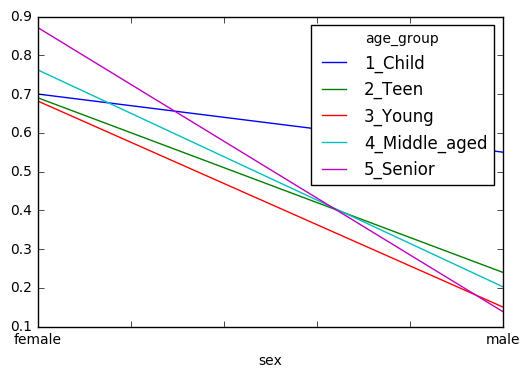

In [699]:
titanic_survival_sex_age_group.plot()

In [700]:
# Survival rate for different age groups, class and sex
titanic_data["age_group"] = titanic_data["age"].apply(group_age)
titanic_survival_sex_pclass = titanic_data.pivot_table('survived', index='sex', columns=['pclass'], aggfunc=np.mean)
titanic_survival_sex_pclass

pclass,1,2,3
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


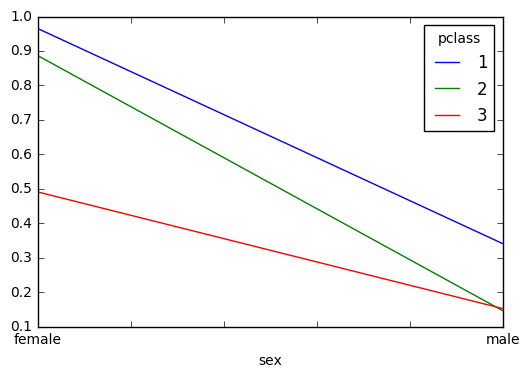

In [701]:
titanic_survival_sex_pclass.plot()

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)


#### Survival rate for different sex

In [702]:
titanic_male_survival_rate = np.mean(titanic_data["survived"][titanic_data["sex"] == "male"])
titanic_male_survival_rate

0.19098457888493475

In [703]:
titanic_female_survival_rate = np.mean(titanic_data["survived"][titanic_data["sex"] == "female"])
titanic_female_survival_rate

0.72746781115879833

In [704]:
# Chi squared test using pivot table of sex and age groups, survival rate
chisq_value, pvalue_gender_survival, titanic_data, expected = chi2_contingency(titanic_survival_sex_age_group)
chisq_value

0.33123463931849773

In [705]:
# Chi squared test using pivot table of sex and passenger class, survival rate
chisq_value, pvalue_gender_survival, titanic_data, expected = chi2_contingency(titanic_survival_sex_pclass)
chisq_value

0.051250751853985789

## Part 5:  Comparative Statistics:  Lusitania

#### Are there any groups that were especially adversely affected in the Titanic wreck? (justify your response numerically)

In [707]:
# Converting Fate and Passenger/Crew columns values to binary values
lb = preprocessing.LabelBinarizer()
lusitania_data["Binarized_Fate"] = lb.fit_transform(lusitania_data["Fate"])
lusitania_data["Binarized_Passenger/Crew"] = lusitania_data["Passenger/Crew"]
lusitania_data["Binarized_Passenger/Crew"] = lb.fit_transform(lusitania_data["Binarized_Passenger/Crew"])
lusitania_data["Binarized_Passenger/Crew"][lusitania_data["Passenger/Crew"] == "Stowaway"] = 1

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [721]:
# Survival rate for different age groups and sex

lusitania_survival_sex_age_group = (lusitania_data.pivot_table('Binarized_Fate', index='Sex', 
                                                   columns=['Adult/Minor'], aggfunc=np.mean))
lusitania_survival_sex_age_group

Adult/Minor,Adult,Infant,Minor
Sex,,,
Female,0.374723,0.125000,0.40000
Male,0.400299,0.225806,0.39726


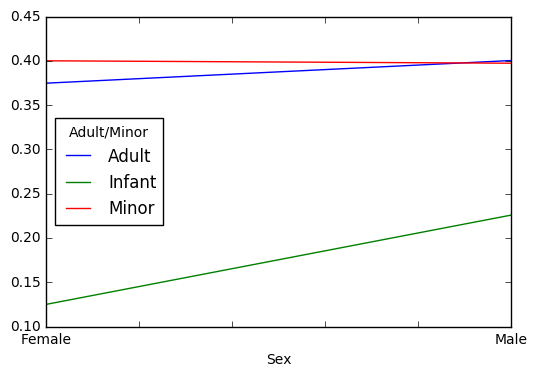

In [722]:
lusitania_survival_sex_age_group.plot()

In [723]:
# Survival rate for passenger/crew and sex

lusitania_survival_sex_passanger_crew = (lusitania_data.pivot_table('Binarized_Fate', index='Sex', 
                                                 columns=['Binarized_Passenger/Crew'], aggfunc=np.mean))
lusitania_survival_sex_passanger_crew

Binarized_Passenger/Crew,0,1
Sex,,
Female,0.369919,0.360000
Male,0.376943,0.418778


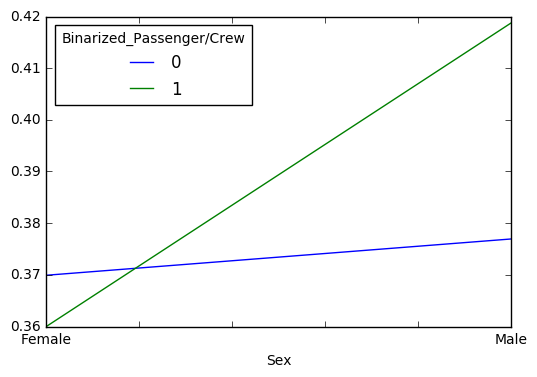

In [724]:
lusitania_survival_sex_passanger_crew.plot()

#### Are there any groups that outperformed the survival of the latter group? (justify your response numerically)



In [725]:
lusitania_male_survival_rate = np.mean(lusitania_data["Binarized_Fate"][lusitania_data["Sex"] == "Male"])
lusitania_male_survival_rate

0.3963963963963964

In [726]:
lusitania_female_survival_rate = np.mean(lusitania_data["Binarized_Fate"][lusitania_data["Sex"] == "Female"])
lusitania_female_survival_rate

0.36943907156673111

In [727]:
lusitania_passenger_survival_rate = np.mean(lusitania_data["Binarized_Fate"][lusitania_data["Passenger/Crew"] == "Passenger"])
lusitania_passenger_survival_rate

0.37420886075949367

In [728]:
lusitania_crew_survival_rate = np.mean(lusitania_data["Binarized_Fate"][lusitania_data["Passenger/Crew"] == "Crew"])
lusitania_crew_survival_rate

0.41847041847041849

In [730]:
chisq_value, pvalue_sex_age_survival, lusitania_data, expected = chi2_contingency(lusitania_survival_sex_age_group)
chisq_value

0.021962129654320782

In [731]:
chisq_value, pvalue_sex_passenger_crew_survival, lusitania_data, expected = chi2_contingency(lusitania_survival_sex_passanger_crew)
chisq_value

2.4971696818462572

#### What does the group-wise survival rate imply about circumstances during these two accidents?